https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL#scrollTo=2uonD20gEQpe

In [26]:
!brew install lightgbm

Updating Homebrew...
==> Downloading https://homebrew.bintray.com/bottles/libomp-10.0.0.catalina.bott
==> Downloading from https://akamai.bintray.com/0e/0ea757dbea7bf12141ef1d209d2f3
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/lightgbm-2.3.1.catalina.bot
==> Downloading from https://akamai.bintray.com/b8/b8b078e8458186a058a47ba94d302
######################################################################## 100.0%
==> Installing dependencies for lightgbm: libomp
==> Installing lightgbm dependency: libomp
==> Pouring libomp-10.0.0.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/libomp/10.0.0: 9 files, 1.3MB
==> Installing lightgbm
==> Pouring lightgbm-2.3.1.catalina.bottle.tar.gz
🍺  /usr/local/Cellar/lightgbm/2.3.1: 78 files, 11.2MB


In [2]:
!pip install pycaret

In [3]:
from pycaret.datasets import get_data
dataset = get_data('credit')

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0    1000.0    5000.0        0  
2    1100.0    1069.0    1000.0        0  
3    9000.0     689.0     679.0        0  
4    1000.0    1000.0     800.0        0  

[5 rows x 24 columns]

In [4]:
#check the shape of data
dataset.shape

(24000, 24)

In [5]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [6]:
from pycaret.classification import *

In [28]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

 
Setup Succesfully Completed!


In [29]:
compare_models()

# Decision Tree Classifier

In [30]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7325  0.6213  0.4221  0.4005  0.4110  0.2381
1       0.7237  0.6199  0.4306  0.3878  0.4081  0.2285
2       0.7400  0.6361  0.4504  0.4184  0.4338  0.2654
3       0.7155  0.5984  0.3853  0.3646  0.3747  0.1907
4       0.7375  0.6175  0.4023  0.4057  0.4040  0.2356
5       0.7356  0.6376  0.4618  0.4127  0.4358  0.2639
6       0.7237  0.6210  0.4363  0.3889  0.4112  0.2315
7       0.7387  0.6365  0.4533  0.4167  0.4342  0.2647
8       0.7262  0.6062  0.3909  0.3833  0.3871  0.2108
9       0.7210  0.6030  0.3881  0.3743  0.3811  0.2011
Mean    0.7294  0.6197  0.4221  0.3953  0.4081  0.2330
SD      0.0081  0.0134  0.0274  0.0175  0.0211  0.0252

In [31]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# K Neighbor classification

In [32]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7406  0.5879  0.1671  0.3296  0.2218  0.0857
1       0.7350  0.5787  0.1473  0.2989  0.1973  0.0601
2       0.7632  0.6648  0.2096  0.4277  0.2814  0.1590
3       0.7462  0.5984  0.1530  0.3375  0.2105  0.0842
4       0.7550  0.6098  0.2040  0.3956  0.2692  0.1397
5       0.7613  0.6203  0.1870  0.4125  0.2573  0.1384
6       0.7412  0.5883  0.1671  0.3315  0.2222  0.0868
7       0.7594  0.6139  0.1898  0.4061  0.2587  0.1371
8       0.7487  0.6100  0.1898  0.3681  0.2505  0.1177
9       0.7542  0.6264  0.1870  0.3860  0.2519  0.1256
Mean    0.7505  0.6099  0.1802  0.3693  0.2421  0.1134
SD      0.0091  0.0234  0.0197  0.0407  0.0260  0.0305

# Tune model

In [34]:
tuned_dt = tune_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8264  0.7219  0.3201  0.7533  0.4493  0.3656
1       0.8239  0.7259  0.3059  0.7500  0.4346  0.3515
2       0.8158  0.7548  0.2946  0.6980  0.4143  0.3258
3       0.8208  0.7171  0.3173  0.7134  0.4392  0.3508
4       0.8133  0.7178  0.3173  0.6627  0.4291  0.3337
5       0.8239  0.7359  0.3003  0.7571  0.4300  0.3481
6       0.8164  0.7197  0.2975  0.7000  0.4175  0.3290
7       0.8264  0.7408  0.3031  0.7754  0.4358  0.3557
8       0.8214  0.7158  0.3003  0.7361  0.4266  0.3423
9       0.8107  0.7322  0.3003  0.6584  0.4125  0.3179
Mean    0.8199  0.7282  0.3057  0.7204  0.4289  0.3420
SD      0.0053  0.0120  0.0087  0.0384  0.0111  0.0143

In [35]:
tuned_knn = tune_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7738  0.6494  0.0708  0.4310  0.1217  0.0632
1       0.7769  0.6662  0.0652  0.4694  0.1144  0.0640
2       0.7838  0.7061  0.1161  0.5541  0.1920  0.1250
3       0.7769  0.6407  0.0623  0.4681  0.1100  0.0612
4       0.7769  0.6507  0.0708  0.4717  0.1232  0.0694
5       0.7788  0.6858  0.0878  0.5000  0.1494  0.0892
6       0.7807  0.6516  0.0765  0.5294  0.1337  0.0824
7       0.7845  0.6591  0.0935  0.5789  0.1610  0.1060
8       0.7769  0.6565  0.0652  0.4694  0.1144  0.0640
9       0.7812  0.6807  0.0935  0.5323  0.1590  0.0995
Mean    0.7791  0.6647  0.0802  0.5004  0.1379  0.0824
SD      0.0032  0.0192  0.0163  0.0442  0.0253  0.0209

# Plot model 

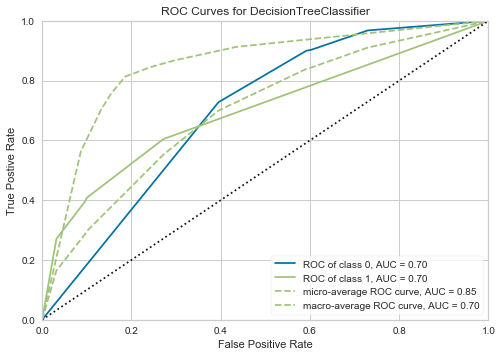

In [37]:
plot_model(tuned_dt, plot = 'auc')

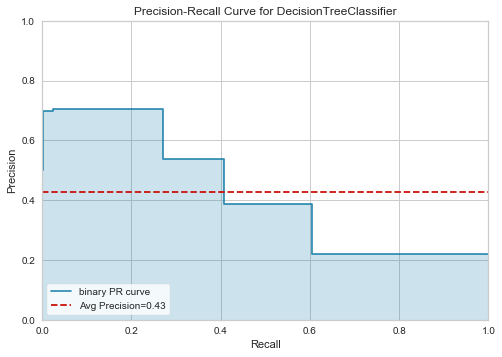

In [38]:
plot_model(tuned_dt, plot = 'pr')

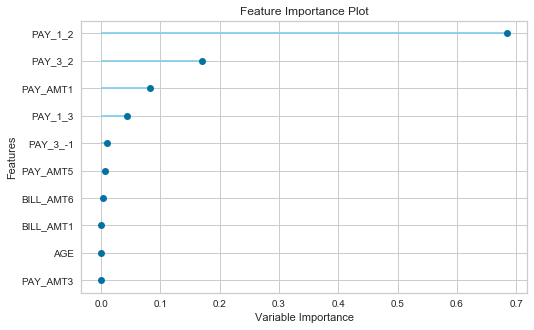

In [39]:
plot_model(tuned_dt, plot='feature')

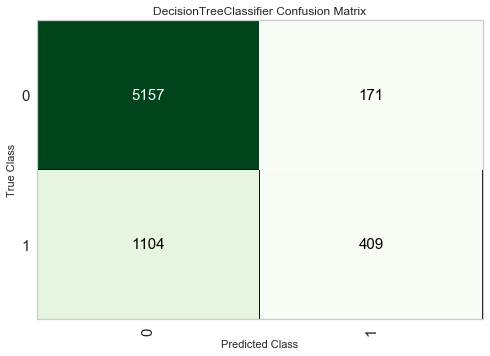

In [40]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [41]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict on test set

In [43]:
predict_model(tuned_dt)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Decision Tree Classifier    0.8136  0.6984  0.2703  0.7052  0.3908  0.3057

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       30000.0  38.0    35031.0    34552.0    33756.0    32960.0    31881.0   
1      110000.0  43.0      390.0      390.0     5050.0    63032.0    33228.0   
2      290000.0  27.0   232523.0   243753.0   253145.0   267412.0   273095.0   
3      110000.0  31.0    89989.0    84229.0    79288.0    73315.0    63818.0   
4      360000.0  34.0   304883.0   301286.0   258122.0   255309.0   233946.0   
...         ...   ...        ...        ...        ...        ...        ...   
6836    50000.0  37.0    49444.0    50621.0    49326.0    29584.0    19665.0   
6837   280000.0  36.0    21251.0    33746.0     8689.0    41652.0     9031.0   
6838    10000.0  43.0    17560.0     9829.0     3604.0        0.0        0.0   
6839   280000.0  27.0    82742.0   153791.0    85601.0   108984.0   105275.0   
6840   190000.0  31.0   150183.0   129603.0   131661.0   137765.0   123616.0   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  \
0       31085.0       0.0       0.0  ...      0.0      1.0      0.0      0.0   
1       31073.0     390.0    5050.0  ...      0.0      0.0      0.0      0.0   
2      278260.0   16500.0   15000.0  ...      1.0      0.0      0.0      0.0   
3       63208.0    4000.0    5000.0  ...      0.0      0.0      0.0      0.0   
4      235916.0   15000.0    9221.0  ...      0.0      0.0      0.0      0.0   
...         ...       ...       ...  ...      ...      ...      ...      ...   
6836    19799.0    2306.0    2155.0  ...      0.0      0.0      0.0      0.0   
6837    14106.0   33840.0    8689.0  ...      0.0      0.0      0.0      0.0   
6838        0.0    2537.0    1000.0  ...      0.0      0.0      0.0      0.0   
6839   117635.0   10077.0   27785.0  ...      0.0      0.0      0.0      0.0   
6840   125841.0    7000.0    7000.0  ...      0.0      0.0      0.0      0.0   

      PAY_6_6  PAY_6_7  PAY_6_8  default  Label   Score  
0         0.0      0.0      0.0        1      0  0.2620  
1         0.0      0.0      0.0        0      0  0.2620  
2         0.0      0.0      0.0        0      1  0.7253  
3         0.0      0.0      0.0        0      0  0.1175  
4         0.0      0.0      0.0        0      0  0.1175  
...       ...      ...      ...      ...    ...     ...  
6836      0.0      0.0      0.0        0      1  0.7253  
6837      0.0      0.0      0.0        0      0  0.1175  
6838      0.0      0.0      0.0        1      0  0.1175  
6839      0.0      0.0      0.0        0      0  0.1175  
6840      0.0      0.0      0.0        0      0  0.1175  

[6841 rows x 93 columns]

# Final Deployment

In [45]:
final_dt = finalize_model(tuned_dt)
#Final Random Forest model parameters for deployment
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=78, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [46]:
predict_model(final_dt)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Decision Tree Classifier    0.8142  0.7159  0.3073  0.6759  0.4225  0.3299

LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       30000.0  38.0    35031.0    34552.0    33756.0    32960.0    31881.0   
1      110000.0  43.0      390.0      390.0     5050.0    63032.0    33228.0   
2      290000.0  27.0   232523.0   243753.0   253145.0   267412.0   273095.0   
3      110000.0  31.0    89989.0    84229.0    79288.0    73315.0    63818.0   
4      360000.0  34.0   304883.0   301286.0   258122.0   255309.0   233946.0   
...         ...   ...        ...        ...        ...        ...        ...   
6836    50000.0  37.0    49444.0    50621.0    49326.0    29584.0    19665.0   
6837   280000.0  36.0    21251.0    33746.0     8689.0    41652.0     9031.0   
6838    10000.0  43.0    17560.0     9829.0     3604.0        0.0        0.0   
6839   280000.0  27.0    82742.0   153791.0    85601.0   108984.0   105275.0   
6840   190000.0  31.0   150183.0   129603.0   131661.0   137765.0   123616.0   

      BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  \
0       31085.0       0.0       0.0  ...      0.0      1.0      0.0      0.0   
1       31073.0     390.0    5050.0  ...      0.0      0.0      0.0      0.0   
2      278260.0   16500.0   15000.0  ...      1.0      0.0      0.0      0.0   
3       63208.0    4000.0    5000.0  ...      0.0      0.0      0.0      0.0   
4      235916.0   15000.0    9221.0  ...      0.0      0.0      0.0      0.0   
...         ...       ...       ...  ...      ...      ...      ...      ...   
6836    19799.0    2306.0    2155.0  ...      0.0      0.0      0.0      0.0   
6837    14106.0   33840.0    8689.0  ...      0.0      0.0      0.0      0.0   
6838        0.0    2537.0    1000.0  ...      0.0      0.0      0.0      0.0   
6839   117635.0   10077.0   27785.0  ...      0.0      0.0      0.0      0.0   
6840   125841.0    7000.0    7000.0  ...      0.0      0.0      0.0      0.0   

      PAY_6_6  PAY_6_7  PAY_6_8  default  Label   Score  
0         0.0      0.0      0.0        1      0  0.2146  
1         0.0      0.0      0.0        0      0  0.1117  
2         0.0      0.0      0.0        0      1  0.7661  
3         0.0      0.0      0.0        0      0  0.1117  
4         0.0      0.0      0.0        0      0  0.1117  
...       ...      ...      ...      ...    ...     ...  
6836      0.0      0.0      0.0        0      1  0.6779  
6837      0.0      0.0      0.0        0      0  0.1117  
6838      0.0      0.0      0.0        1      0  0.2146  
6839      0.0      0.0      0.0        0      0  0.1117  
6840      0.0      0.0      0.0        0      0  0.1117  

[6841 rows x 93 columns]

# Predict on unseen model

In [48]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         1   48      0      0      0      0   
1     200000    2          1         1   40      2      2      2      2   
2      50000    2          3         1   44      1      2      3      2   
3      60000    2          2         1   31      2      2     -1      0   
4     120000    2          3         2   32     -1      0      0      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...     8011.0    2028.0    2453.0    2329.0     431.0     300.0   
1      2  ...    89112.0    4200.0    4100.0    3000.0    3400.0    3500.0   
2      4  ...    15798.0    2100.0    1000.0    2300.0       0.0       0.0   
3      0  ...    30384.0    1132.0   60994.0    1436.0    1047.0    1056.0   
4      0  ...    81354.0    2429.0    3120.0    3300.0   10000.0    3200.0   

   PAY_AMT6  default  Label   Score  
0     500.0        0      0  0.1117  
1       0.0        1      1  0.7661  
2       0.0        1      0  0.3986  
3    1053.0        1      1  0.6779  
4    3200.0        0      0  0.1117  

[5 rows x 26 columns]

# Save model 

In [49]:
save_model(final_dt,'Final DT Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


# load model

In [50]:
saved_final_dt = load_model('Final DT Model 08Feb2020')

Transformation Pipeline and Model Sucessfully Loaded


In [51]:
new_prediction = predict_model(saved_final_dt, data=data_unseen)

In [52]:
new_prediction.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      50000    2          2         1   48      0      0      0      0   
1     200000    2          1         1   40      2      2      2      2   
2      50000    2          3         1   44      1      2      3      2   
3      60000    2          2         1   31      2      2     -1      0   
4     120000    2          3         2   32     -1      0      0      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      0  ...     8011.0    2028.0    2453.0    2329.0     431.0     300.0   
1      2  ...    89112.0    4200.0    4100.0    3000.0    3400.0    3500.0   
2      4  ...    15798.0    2100.0    1000.0    2300.0       0.0       0.0   
3      0  ...    30384.0    1132.0   60994.0    1436.0    1047.0    1056.0   
4      0  ...    81354.0    2429.0    3120.0    3300.0   10000.0    3200.0   

   PAY_AMT6  default  Label   Score  
0     500.0        0      0  0.1117  
1       0.0        1      1  0.7661  
2       0.0        1      0  0.3986  
3    1053.0        1      1  0.6779  
4    3200.0        0      0  0.1117  

[5 rows x 26 columns]

In [53]:
from pycaret.datasets import get_data
dataset = get_data('credit', profile=True)

# Preprocessing

In [54]:
exp_clf102 = setup(data = data, target = 'default', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['LIMIT_BAL', 'AGE'],
                  group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

 
Setup Succesfully Completed!


In [55]:
compare_models()

# Model creation

In [56]:
dt = create_model('dt', fold = 5)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7268  0.6204  0.4235  0.3914  0.4068  0.2297
1       0.7334  0.6144  0.3980  0.3975  0.3977  0.2265
2       0.7359  0.6224  0.4178  0.4058  0.4117  0.2415
3       0.7381  0.6229  0.4164  0.4095  0.4129  0.2444
4       0.7270  0.6257  0.4433  0.3957  0.4182  0.2406
Mean    0.7323  0.6212  0.4198  0.4000  0.4095  0.2366
SD      0.0046  0.0038  0.0145  0.0067  0.0069  0.0071

In [57]:
dt = create_model('dt', fold = 5, round = 2)

Accuracy   AUC  Recall  Prec.    F1  Kappa
0         0.73  0.62    0.42   0.39  0.41   0.23
1         0.73  0.61    0.40   0.40  0.40   0.23
2         0.74  0.62    0.42   0.41  0.41   0.24
3         0.74  0.62    0.42   0.41  0.41   0.24
4         0.73  0.63    0.44   0.40  0.42   0.24
Mean      0.73  0.62    0.42   0.40  0.41   0.24
SD        0.00  0.00    0.01   0.01  0.01   0.01

# Model tuning

In [58]:
tuned_rf = tune_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8277  0.7726  0.3739  0.7097  0.4898  0.3979
1       0.8214  0.7772  0.3654  0.6789  0.4751  0.3790
2       0.8202  0.8208  0.3739  0.6667  0.4791  0.3807
3       0.8170  0.7538  0.3541  0.6614  0.4613  0.3630
4       0.8177  0.7665  0.3456  0.6703  0.4561  0.3597
5       0.8158  0.7757  0.3343  0.6667  0.4453  0.3491
6       0.8183  0.7607  0.3569  0.6667  0.4649  0.3674
7       0.8258  0.7887  0.3683  0.7027  0.4833  0.3906
8       0.8214  0.7535  0.3626  0.6809  0.4732  0.3775
9       0.8144  0.7759  0.3768  0.6364  0.4733  0.3695
Mean    0.8200  0.7745  0.3612  0.6740  0.4701  0.3734
SD      0.0040  0.0187  0.0129  0.0198  0.0127  0.0139

In [59]:
#tuned_rf optimize parameter set to the default 'Accuracy'
plot_model(tuned_rf, plot = 'parameter')

Parameters
bootstrap                      True
ccp_alpha                         0
class_weight                   None
criterion                   entropy
max_depth                        70
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease             0
min_impurity_split             None
min_samples_leaf                  4
min_samples_split                 5
min_weight_fraction_leaf          0
n_estimators                     40
n_jobs                         None
oob_score                     False
random_state                    123
verbose                           0
warm_start                    False

# Ensemble a model

In [62]:
# let's create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7274  0.6191  0.4249  0.3927  0.4082  0.2315
1       0.7199  0.6096  0.4023  0.3757  0.3885  0.2072
2       0.7199  0.6119  0.4164  0.3789  0.3968  0.2149
3       0.7180  0.6036  0.3966  0.3714  0.3836  0.2010
4       0.7249  0.6007  0.3768  0.3778  0.3773  0.2008
5       0.7475  0.6387  0.4448  0.4313  0.4379  0.2752
6       0.7293  0.6296  0.4533  0.4010  0.4255  0.2493
7       0.7387  0.6244  0.4193  0.4111  0.4151  0.2470
8       0.7274  0.6179  0.4164  0.3910  0.4033  0.2269
9       0.7279  0.6233  0.4363  0.3959  0.4151  0.2384
Mean    0.7281  0.6179  0.4187  0.3927  0.4051  0.2292
SD      0.0086  0.0111  0.0218  0.0175  0.0181  0.0228

In [63]:
bagged_dt = ensemble_model(dt)
# check the parameters of bagged_dt
print(bagged_dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8102  0.7432  0.3683  0.6190  0.4618  0.3555
1       0.8108  0.7269  0.3399  0.6349  0.4428  0.3412
2       0.8158  0.7465  0.4023  0.6311  0.4913  0.3855
3       0.8026  0.7187  0.3456  0.5922  0.4365  0.3267
4       0.8089  0.7279  0.3343  0.6277  0.4362  0.3338
5       0.8152  0.7297  0.3626  0.6465  0.4646  0.3634
6       0.7939  0.7170  0.3201  0.5594  0.4072  0.2935
7       0.8095  0.7557  0.3371  0.6296  0.4391  0.3368
8       0.8051  0.7284  0.3314  0.6094  0.4294  0.3240
9       0.8050  0.7375  0.3654  0.5972  0.4534  0.3430
Mean    0.8077  0.7332  0.3507  0.6147  0.4462  0.3403
SD      0.0061  0.0117  0.0229  0.0245  0.0218  0.0235

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [64]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.7632  0.6999  0.3569  0.4549  0.4000  0.2551
1       0.7738  0.6778  0.2890  0.4811  0.3611  0.2339
2       0.7638  0.6653  0.3598  0.4568  0.4025  0.2579
3       0.7531  0.6661  0.3683  0.4319  0.3976  0.2435
4       0.7481  0.6778  0.3796  0.4227  0.4000  0.2412
5       0.7807  0.7216  0.3683  0.5058  0.4262  0.2948
6       0.7776  0.6397  0.3796  0.4963  0.4302  0.2950
7       0.8001  0.7222  0.3909  0.5702  0.4639  0.3462
8       0.7701  0.7038  0.3881  0.4757  0.4275  0.2854
9       0.7818  0.6941  0.3371  0.5107  0.4061  0.2793
Mean    0.7712  0.6868  0.3618  0.4806  0.4115  0.2732
SD      0.0144  0.0250  0.0286  0.0410  0.0258  0.0324

In [65]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8183  0.7592  0.3938  0.6465  0.4894  0.3868
1       0.8189  0.7606  0.3739  0.6600  0.4774  0.3779
2       0.8258  0.7828  0.4193  0.6697  0.5157  0.4163
3       0.8152  0.7426  0.3796  0.6381  0.4760  0.3725
4       0.8127  0.7589  0.3654  0.6324  0.4632  0.3594
5       0.8227  0.7677  0.3994  0.6651  0.4991  0.3994
6       0.8139  0.7298  0.3768  0.6333  0.4725  0.3682
7       0.8258  0.7660  0.3909  0.6866  0.4982  0.4023
8       0.8158  0.7447  0.3796  0.6411  0.4769  0.3739
9       0.8138  0.7582  0.3966  0.6250  0.4853  0.3785
Mean    0.8183  0.7571  0.3875  0.6498  0.4854  0.3835
SD      0.0047  0.0141  0.0148  0.0187  0.0147  0.0167

In [66]:
tuned_bagged_dt = tune_model('dt', ensemble=True, method='Bagging')
# check the parameters of the tuned Decision Tree with bagging
print(tuned_bagged_dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8214  0.7770  0.3909  0.6635  0.4920  0.3923
1       0.8239  0.7860  0.3683  0.6915  0.4806  0.3862
2       0.8227  0.8166  0.3994  0.6651  0.4991  0.3994
3       0.8139  0.7520  0.3683  0.6373  0.4668  0.3637
4       0.8189  0.7740  0.3598  0.6684  0.4678  0.3703
5       0.8170  0.7807  0.3654  0.6548  0.4691  0.3691
6       0.8158  0.7587  0.3626  0.6497  0.4655  0.3648
7       0.8333  0.7890  0.3739  0.7458  0.4981  0.4111
8       0.8189  0.7640  0.3739  0.6600  0.4774  0.3779
9       0.8188  0.7812  0.3909  0.6509  0.4885  0.3866
Mean    0.8205  0.7779  0.3754  0.6687  0.4805  0.3822
SD      0.0052  0.0172  0.0129  0.0290  0.0125  0.0150

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=18,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,


In [67]:
blend_hard = blend_models()

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.8264  0.0  0.3711  0.7043  0.4861  0.3935
1       0.8246  0.0  0.3484  0.7110  0.4677  0.3770
2       0.8258  0.0  0.3796  0.6943  0.4908  0.3965
3       0.8177  0.0  0.3484  0.6685  0.4581  0.3613
4       0.8264  0.0  0.3484  0.7235  0.4704  0.3814
5       0.8227  0.0  0.3513  0.6966  0.4670  0.3743
6       0.8189  0.0  0.3399  0.6818  0.4537  0.3594
7       0.8296  0.0  0.3513  0.7425  0.4769  0.3903
8       0.8221  0.0  0.3428  0.6994  0.4601  0.3681
9       0.8163  0.0  0.3626  0.6531  0.4663  0.3661
Mean    0.8230  0.0  0.3544  0.6975  0.4697  0.3768
SD      0.0041  0.0  0.0120  0.0245  0.0113  0.0127

In [68]:
blend_soft = blend_models(method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8246  0.7758  0.4136  0.6667  0.5105  0.4107
1       0.8227  0.7818  0.3258  0.7188  0.4483  0.3601
2       0.8189  0.8088  0.4306  0.6333  0.5126  0.4064
3       0.8170  0.7594  0.3144  0.6894  0.4319  0.3405
4       0.8208  0.7633  0.3116  0.7190  0.4348  0.3475
5       0.8202  0.7899  0.3258  0.7012  0.4449  0.3543
6       0.8152  0.7615  0.3173  0.6747  0.4316  0.3379
7       0.8258  0.7886  0.3513  0.7168  0.4715  0.3815
8       0.8195  0.7581  0.3286  0.6946  0.4462  0.3544
9       0.8113  0.7717  0.3314  0.6429  0.4374  0.3376
Mean    0.8196  0.7759  0.3450  0.6857  0.4570  0.3631
SD      0.0041  0.0156  0.0401  0.0293  0.0294  0.0258

In [69]:
"""
we will create 4 specific models to be passed into blend_models().
Note that verbose is set to False to avoid printing the score grid of individual models.
"""

gbc = create_model('gbc', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [70]:
blend_specific_soft = blend_models(estimator_list = [gbc,dt, lightgbm, xgboost], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8164  0.7687  0.3909  0.6389  0.4851  0.3811
1       0.8139  0.7709  0.3711  0.6359  0.4687  0.3652
2       0.8158  0.7980  0.3994  0.6323  0.4896  0.3841
3       0.8108  0.7538  0.3598  0.6256  0.4568  0.3522
4       0.8164  0.7588  0.3683  0.6500  0.4702  0.3693
5       0.8133  0.7835  0.3711  0.6329  0.4679  0.3638
6       0.8183  0.7598  0.3994  0.6438  0.4930  0.3896
7       0.8246  0.7788  0.3711  0.6931  0.4834  0.3892
8       0.8158  0.7473  0.3768  0.6425  0.4750  0.3724
9       0.8094  0.7677  0.3796  0.6119  0.4685  0.3601
Mean    0.8155  0.7687  0.3788  0.6407  0.4758  0.3727
SD      0.0040  0.0143  0.0129  0.0202  0.0109  0.0122

In [71]:
blend_specific_hard = blend_models(estimator_list = [gbc, dt, lightgbm, xgboost], method = 'hard')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.8308  0.0  0.3711  0.7318  0.4925  0.4037
1       0.8246  0.0  0.3484  0.7110  0.4677  0.3770
2       0.8233  0.0  0.3626  0.6919  0.4758  0.3818
3       0.8227  0.0  0.3513  0.6966  0.4670  0.3743
4       0.8264  0.0  0.3569  0.7159  0.4764  0.3860
5       0.8246  0.0  0.3598  0.7017  0.4757  0.3832
6       0.8221  0.0  0.3541  0.6906  0.4682  0.3744
7       0.8321  0.0  0.3569  0.7545  0.4846  0.3993
8       0.8183  0.0  0.3286  0.6864  0.4444  0.3516
9       0.8169  0.0  0.3683  0.6533  0.4710  0.3706
Mean    0.8242  0.0  0.3558  0.7034  0.4723  0.3802
SD      0.0045  0.0  0.0113  0.0260  0.0120  0.0140

In [72]:
stack_soft = stack_models([gbc, dt, lightgbm, xgboost])

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8246  0.7838  0.3739  0.6911  0.4853  0.3907
1       0.8202  0.7937  0.3569  0.6774  0.4675  0.3716
2       0.8252  0.8219  0.3938  0.6814  0.4991  0.4023
3       0.8221  0.7854  0.3654  0.6825  0.4760  0.3804
4       0.8252  0.7805  0.3711  0.6968  0.4843  0.3906
5       0.8189  0.7971  0.3654  0.6649  0.4717  0.3734
6       0.8177  0.7527  0.3569  0.6632  0.4641  0.3659
7       0.8321  0.7893  0.3824  0.7297  0.5019  0.4125
8       0.8183  0.7522  0.3456  0.6740  0.4569  0.3611
9       0.8113  0.7789  0.3711  0.6238  0.4654  0.3596
Mean    0.8215  0.7835  0.3683  0.6785  0.4772  0.3808
SD      0.0054  0.0194  0.0130  0.0256  0.0143  0.0169

In [73]:
stack_hard = stack_models([gbc, dt, lightgbm, xgboost], method='hard')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8264  0.7798  0.3739  0.7021  0.4880  0.3950
1       0.8208  0.7879  0.3428  0.6914  0.4583  0.3653
2       0.8252  0.8158  0.3853  0.6869  0.4936  0.3979
3       0.8214  0.7859  0.3626  0.6809  0.4732  0.3775
4       0.8246  0.7758  0.3683  0.6952  0.4815  0.3877
5       0.8189  0.7980  0.3541  0.6720  0.4638  0.3672
6       0.8214  0.7466  0.3484  0.6910  0.4633  0.3698
7       0.8302  0.7865  0.3683  0.7303  0.4896  0.4008
8       0.8246  0.7512  0.3513  0.7086  0.4697  0.3786
9       0.8107  0.7734  0.3569  0.6269  0.4549  0.3506
Mean    0.8224  0.7801  0.3612  0.6885  0.4736  0.3790
SD      0.0050  0.0194  0.0123  0.0256  0.0132  0.0154

In [74]:
stack_soft2 = stack_models([gbc, dt, lightgbm], meta_model=xgboost)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8296  0.7807  0.3796  0.7166  0.4963  0.4052
1       0.8271  0.7907  0.3541  0.7225  0.4753  0.3859
2       0.8170  0.8209  0.3626  0.6564  0.4672  0.3676
3       0.8214  0.7703  0.3598  0.6828  0.4712  0.3760
4       0.8252  0.7784  0.3683  0.6989  0.4824  0.3891
5       0.8202  0.7859  0.3739  0.6667  0.4791  0.3807
6       0.8221  0.7695  0.3626  0.6845  0.4741  0.3789
7       0.8352  0.7944  0.3824  0.7500  0.5066  0.4199
8       0.8170  0.7630  0.3569  0.6597  0.4632  0.3645
9       0.8176  0.7871  0.3796  0.6505  0.4794  0.3780
Mean    0.8232  0.7841  0.3680  0.6889  0.4795  0.3846
SD      0.0057  0.0155  0.0098  0.0311  0.0125  0.0160

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8246  0.7838  0.3739  0.6911  0.4853  0.3907
1       0.8202  0.7937  0.3569  0.6774  0.4675  0.3716
2       0.8252  0.8219  0.3938  0.6814  0.4991  0.4023
3       0.8221  0.7854  0.3654  0.6825  0.4760  0.3804
4       0.8252  0.7805  0.3711  0.6968  0.4843  0.3906
5       0.8189  0.7971  0.3654  0.6649  0.4717  0.3734
6       0.8177  0.7527  0.3569  0.6632  0.4641  0.3659
7       0.8321  0.7893  0.3824  0.7297  0.5019  0.4125
8       0.8183  0.7522  0.3456  0.6740  0.4569  0.3611
9       0.8113  0.7789  0.3711  0.6238  0.4654  0.3596
Mean    0.8215  0.7835  0.3683  0.6785  0.4772  0.3808
SD      0.0054  0.0194  0.0130  0.0256  0.0143  0.0169

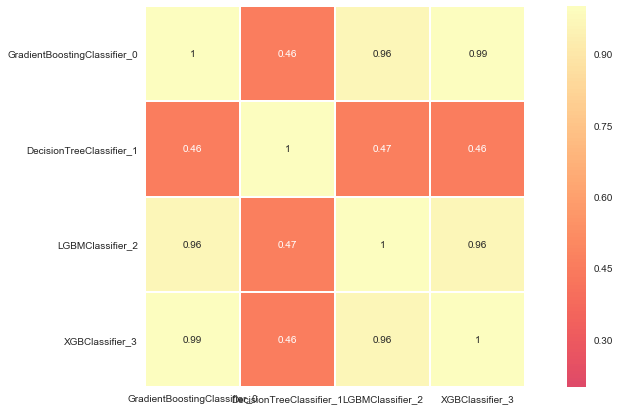

In [75]:
stack_soft_plot = stack_models([gbc,dt,lightgbm,xgboost], plot=True)

# Model calibration

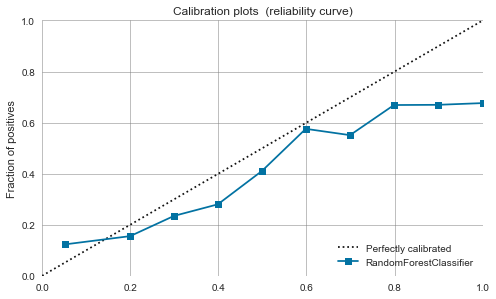

In [76]:
rf = create_model('rf')
plot_model(rf, plot='calibration')

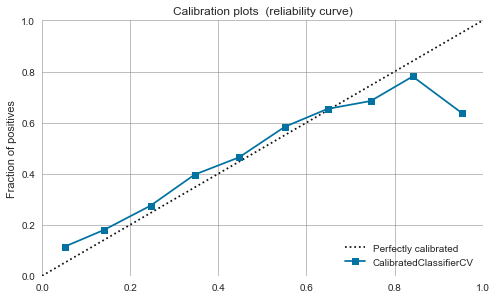

In [77]:
calibrated_rf = calibrate_model(rf)
plot_model(calibrated_rf, plot='calibration')

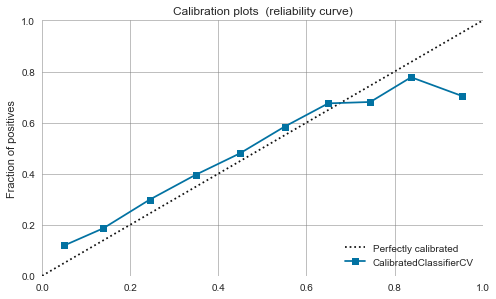

In [78]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')
plot_model(calibrated_rf_isotonic, plot='calibration')

# Predict on test

In [79]:
predict_model(stack_soft)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Stacking Classifier    0.8144  0.7565  0.3404  0.6544  0.4478  0.3493

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0      0.185503   0.228653   0.237625   0.287848   0.381068   0.186667   
1     -1.119291  -1.122156  -0.860027   0.932949   0.423314   0.186336   
2      1.812102   1.842231   1.914346   2.006036   1.964325   2.449644   
3      1.115349   1.104319   1.078652   1.073672   1.059294   0.866052   
4      1.958270   1.945128   1.924726   1.981376   1.901535   2.274077   
...         ...        ...        ...        ...        ...        ...   
6836   0.536020   0.619345   0.621897   0.183037  -0.074943  -0.155095   
6837  -0.250188   0.205301  -0.690003   0.523659  -0.588480  -0.350481   
6838  -0.384902  -0.670589  -0.930247  -1.089524  -1.118999  -0.902232   
6839   1.039759   1.569942   1.146984   1.413521   1.455859   1.523550   
6840   1.528009   1.450471   1.497219   1.592216   1.563423   1.596369   

      PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  ...  AGE_3.0  AGE_4.0  AGE_5.0  \
0    -1.264012 -1.218065 -1.149379 -1.103196  ...      0.0      0.0      0.0   
1    -1.046647  0.707975  2.201970 -0.442260  ...      0.0      0.0      0.0   
2     1.832772  1.831199  2.008846  1.644894  ...      1.0      0.0      0.0   
3     0.419362  0.695949  0.282203  0.401379  ...      0.0      0.0      1.0   
4     1.771748  1.404368  1.510759  1.470099  ...      0.0      0.0      0.0   
...        ...       ...       ...       ...  ...      ...      ...      ...   
6836 -0.156757 -0.197316 -0.537773  2.002988  ...      0.0      0.0      0.0   
6837  2.121627  1.341622  2.173728  1.563234  ...      0.0      0.0      0.0   
6838 -0.067565 -0.700898 -1.149379 -1.103196  ...      0.0      0.0      0.0   
6839  1.451839  2.127302  2.125410 -1.087880  ...      1.0      0.0      0.0   
6840  1.075750  1.099169  1.434568  0.975469  ...      0.0      0.0      1.0   

      AGE_6.0  AGE_7.0  AGE_8.0  AGE_9.0  default  Label   Score  
0         0.0      1.0      0.0      0.0        1      0  0.4900  
1         0.0      0.0      0.0      1.0        0      0  0.1586  
2         0.0      0.0      0.0      0.0        0      1  0.8027  
3         0.0      0.0      0.0      0.0        0      0  0.0462  
4         1.0      0.0      0.0      0.0        0      0  0.1318  
...       ...      ...      ...      ...      ...    ...     ...  
6836      0.0      1.0      0.0      0.0        0      1  0.7352  
6837      0.0      1.0      0.0      0.0        0      0  0.0618  
6838      0.0      0.0      0.0      1.0        1      0  0.0826  
6839      0.0      0.0      0.0      0.0        0      0  0.1243  
6840      0.0      0.0      0.0      0.0        0      0  0.0724  

[6841 rows x 125 columns]

# Finalise, Predict, Save, and Load model

In [ ]:
final_stack_soft = finalize_model(stack_soft)

In [ ]:
unseen_predictions = predict_model(final_stack_soft, data=data_unseen)
unseen_predictions.head()

In [ ]:
save_experiment('Experiment_123 08Feb2020')

In [ ]:
saved_experiment = load_experiment('Experiment_123 08Feb2020')

In [ ]:
final_stack_soft_loaded = saved_experiment[57]

In [ ]:
new_prediction = predict_model(final_stack_soft_loaded, data=data_unseen)
new_prediction.head()